In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import load_results
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol

In [4]:
#create the model object
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench import (TimeSeriesOutcome, 
                           RealParameter)

directory = 'H:/MyDocuments/IIASA-Felix/Model files/Parallel_NatCom2/'

vensimModel = VensimModel("FelixModel", wd=directory, model_file=r'FeliX3_Sibel_v16_NoExcel.vpm')


df_unc = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Uncertainties')

#df_drop = pd.read_csv(directory+'toremove_n2500_sc0.csv')
#df_drop.set_index('Parameter', inplace=True)
#for p in df_drop.index:
#    df_unc = df_unc[df_unc['Uncertainties'] != p]
df_out = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='Outcomes')
df_unc['Min'] = df_unc['Reference'] * 0.5
df_unc['Max'] = df_unc['Reference'] * 1.5

vensimModel.uncertainties = [RealParameter(row['Uncertainties'], row['Min'], row['Max']) for index, row in df_unc.iterrows()]

vensimModel.outcomes = [TimeSeriesOutcome('Total Agricultural and Land Use Emissions')]




C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:18: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:23: ImportWarning: pysd connector not available
  warnings.warn("pysd connector not available", ImportWarning)


In [7]:
df_drop

,ST,ST_conf,S1,S1_conf
Parameter,,,,
SA Response efficacy multiplier[primary],0.004099,3.837590e-04,0.002761,0.003609
"SA L social norm[""80-84""]",0.003121,2.543050e-04,0.000843,0.003249
"SA L social norm[""10-14""]",0.002692,3.220520e-04,0.006091,0.002826
"SA k health risk attitude[""25-29""]",0.001848,3.376380e-04,-0.000616,0.002324
"SA k social norm[""45-49""]",0.001523,1.877480e-04,0.000366,0.002181
SA k risk attitude,0.001212,1.598430e-04,0.000292,0.001790
"SA x0 social norm[""80-84""]",0.001179,1.074690e-04,0.000558,0.001892
"SA k social norm[""10-14""]",0.000932,2.160860e-04,0.000743,0.001709
"SA L health risk attitude[""80-84""]",0.000687,6.350000e-05,0.000788,0.001382


In [3]:
r_dir = 'H:/MyDocuments/EclipseWorkspace/VensimTest/src/'

In [8]:


sc = 0
df = pd.DataFrame()
for n in [500, 1000, 2500, 5000]:
    if n not in [5000]:
        results = load_results(r_dir+'./Diet_Sobol_n{}_sc{}_v4.tar.gz'.format(n, sc))
    else:
        results = load_results(r_dir+'./Diet_Sobol_n{}_sc{}_v3.tar.gz'.format(n, sc))
    experiments,outcomes = results
    data = outcomes['Total Agricultural and Land Use Emissions']#[:,-1]
    #calculate_sobol
    problem = get_SALib_problem(vensimModel.uncertainties)
    scores = sobol.analyze(problem, data, calc_second_order=True, print_to_console=False)
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])
    Si_df.sort_values(by=['ST'], ascending=False, inplace=True)
    #Si_df.to_csv(directory+"SobolIndices_n{}_sc{}.csv".format(n, sc))
    
    df[n] = Si_df['ST']

In [9]:
df.head()

,500,1000,2500,5000
"SA x0 social norm[""20-24""]",0.267563,0.273461,0.273733,0.275773
SA Self efficacy multiplier[female],0.266811,0.263010,0.256820,0.256634
SA Normal fraction intended to change diet,0.180405,0.183349,0.178535,0.180173
SA Self efficacy multiplier[male],0.114384,0.117870,0.116456,0.114513
SA Response efficacy multiplier[secondary],0.049367,0.049285,0.048470,0.048213


In [43]:
len(df)

19

In [10]:
color_list = sns.color_palette()
n_c = len(color_list)
n_c

10

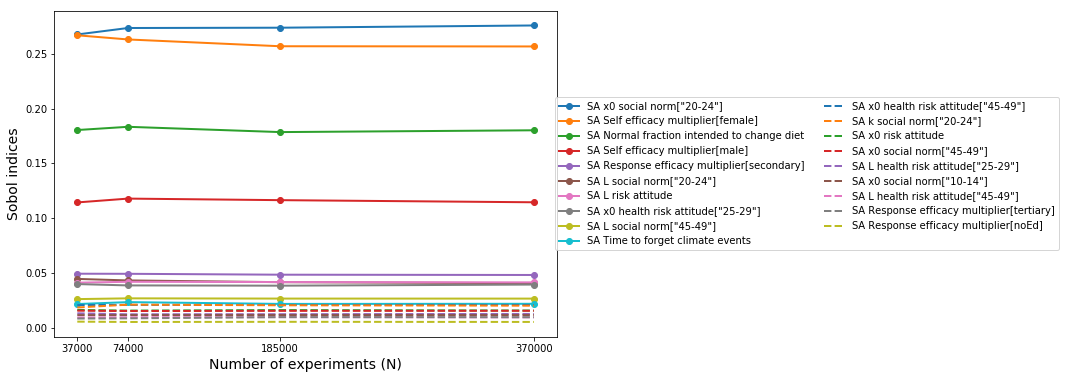

In [11]:
fig, ax = plt.subplots(figsize=(9,6))

# for i, row in df.iterrows():
#     ax.scatter(x=df.columns, y=row.values, c='blue')
# plt.show()

for i, par in enumerate(df.index):
    if i < 10:
        df.iloc[i, :].plot(ax=ax, linestyle='-', marker='o', color=color_list[i], linewidth=2, legend=False)
    elif i>=10 and i<20:
        df.iloc[i, :].plot(ax=ax, linestyle='--', color=color_list[i-10], linewidth=2, legend=False)
    elif i>=20 and i<30:
        df.iloc[i, :].plot(ax=ax, linestyle='-.', color=color_list[i-20], linewidth=2, legend=False)
    elif i>=30 :
        df.iloc[i, :].plot(ax=ax, linestyle=':', color=color_list[i-30], linewidth=2, legend=False)

        
        
ax.set_xticks([500, 1000, 2500,5000])
ax.set_xticklabels([500*74, 1000*74, 2500*74,5000*74])
ax.set_xlabel("Number of experiments (N)", fontsize=14)
ax.set_ylabel("Sobol indices", fontsize=14)
ax.legend(loc='right', ncol=2, fontsize=10, bbox_to_anchor=(2, .5), borderaxespad=0.)
plt.savefig(directory+"Sobol_covergence_v2.png", dpi=300, bbox_inches='tight')
plt.show()

In [4]:
def plot_scores(scores, problem, n, sc, ooi, t):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])
    Si_df.to_csv(directory+"SobolIndices_n{}_sc{}_{}_t{}.csv".format(n, sc, ooi, t))

    
    Si_df.sort_values(by=['ST'], ascending=False, inplace=True)
    #Si_df[Si_df['ST'] <= 0.005].to_csv(directory+'toremove_n{}_sc{}.csv'.format(n, sc))
    Si_df = Si_df[Si_df['ST'] > 0.005]
    
    Si_df = Si_df.iloc[::-1]

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]
    
    sns.set_style('white')
    fig, ax = plt.subplots(figsize=(5, 10))

    indices.plot.barh(xerr=err.values.T,ax=ax, color = ['darkorange', 'cornflowerblue'], width=.8)
    ax.set_ylabel('')
    ax.set_xlabel('Sobol index', fontsize=14)

    ylabels = ax.get_yticklabels()
    ylabels = [item.get_text()[2:] for item in ylabels]
    ax.set_yticklabels(ylabels, fontsize=12)
    
    handles,labels = ax.get_legend_handles_labels()

    handles = [handles[1], handles[0]]
    labels = [labels[1], labels[0]]

    ax.legend(handles,labels,fontsize=14,markerscale=2 )
    sc_dic = {0:0, 2:1, 3:2, 4:3}
    ax.set_title("Scenario {}, {}".format(sc_dic[sc], t), fontsize=14)

    plt.savefig(directory+"Sobol_n{}_sc{}_{}_v4_t{}.png".format(n, sc, ooi, t), dpi=600,  bbox_inches='tight')
    return fig

In [7]:
def make_sobol_df(scores, problem, n, sc, t):
    scores_filtered = {k:scores[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])
    Si_df.to_csv(directory+"SobolIndices_n{}_sc{}_t{}.csv".format(n, sc, t))
    
    Si_df.sort_values(by=['ST'], ascending=False, inplace=True)
    Si_df = Si_df[Si_df['ST'] > 0.01]
    
    Si_df = Si_df.iloc[::-1]

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]
    return indices, err
    

In [5]:
sc = 0
n = 2500
problem = get_SALib_problem(vensimModel.uncertainties)
results1 = load_results(r_dir+'Diet_Sobol_n2500_sc0_v4_2050.tar.gz')
experiments, outcomes = results1
data = outcomes['Total Agricultural and Land Use Emissions']
scores1 = sobol.analyze(problem, data, calc_second_order=True, print_to_console=False)

results2 = load_results(r_dir+'Diet_Sobol_n2500_sc0_v3.tar.gz')
experiments, outcomes = results2
data = outcomes['Total Agricultural and Land Use Emissions']
scores2 = sobol.analyze(problem, data, calc_second_order=True, print_to_console=False)

In [8]:
inds1, err1 = make_sobol_df(scores1, problem, n, sc, 2050)
inds2, err2 = make_sobol_df(scores2, problem, n, sc, 2100)

In [9]:
err1

,S1_conf,ST_conf
"SA L social norm[""45-49""]",0.006021,0.001658
"SA k social norm[""20-24""]",0.006769,0.002782
SA Response efficacy multiplier[noEd],0.006162,0.001657
"SA x0 health risk attitude[""45-49""]",0.006076,0.001899
"SA x0 social norm[""10-14""]",0.007534,0.002218
SA Time to forget climate events,0.007513,0.003824
"SA L health risk attitude[""25-29""]",0.008331,0.003073
SA x0 risk attitude,0.010129,0.004715
SA L risk attitude,0.012264,0.005407
SA Response efficacy multiplier[secondary],0.011657,0.005078


In [10]:
for i in inds2.index:
    if i not in inds1.index:
        print("2 not in 1")

2 not in 1


In [11]:
merged = inds1.merge(inds2, left_index=True, right_index=True, how='inner')
merged

,S1_x,ST_x,S1_y,ST_y
"SA L social norm[""45-49""]",0.008518,0.012573,0.019406,0.026550
"SA k social norm[""20-24""]",0.003673,0.013311,0.008107,0.022370
"SA x0 health risk attitude[""45-49""]",0.009760,0.015778,0.013452,0.020590
"SA x0 social norm[""10-14""]",0.010000,0.017519,0.006633,0.011251
SA Time to forget climate events,0.012137,0.021899,0.013942,0.021966
"SA L health risk attitude[""25-29""]",0.007797,0.022897,0.004044,0.012300
SA x0 risk attitude,0.013971,0.034813,0.009404,0.015379
SA L risk attitude,0.026265,0.038657,0.028350,0.042607
SA Response efficacy multiplier[secondary],0.016533,0.045902,0.030063,0.050944
"SA L social norm[""20-24""]",0.031307,0.065210,0.019990,0.041707


In [13]:
def plot_scores_2(inds1, err1, inds2, err2, n, sc):
       # take 2 dfs, for 2050 and for 2100 values
       # make a grid of two axes
       # keep the y axis according to 2050, align 2100 accordingly
    #make a combined indices df to ensure index match
    
    mergedind = inds1.merge(inds2, left_index=True, right_index=True, how='inner')
    mergederr = err1.merge(err2, left_index=True, right_index=True, how='inner')
    
    sns.set_style('white')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 10)) 
    plt.subplots_adjust(wspace=0.1)
    ax = axes[0]
    ind = mergedind[['S1_x','ST_x']]
    err = mergederr[['S1_conf_x','ST_conf_x']]
    ind.plot.barh(xerr=err.values.T,ax=ax, color = ['darkorange', 'cornflowerblue'], width=.8)
    ax.set_ylabel('')
    ax.legend().set_visible(False)
    ax.set_xlabel('Sobol index', fontsize=14)

    ylabels = ax.get_yticklabels()
    ylabels = [item.get_text()[2:] for item in ylabels]
    ax.set_yticklabels(ylabels, fontsize=12)
    ax.set_title("2050", fontsize=12)
    
    ax = axes[1]
    ind = mergedind[['S1_y','ST_y']]
    err = mergederr[['S1_conf_y','ST_conf_y']]
    ind.plot.barh(xerr=err.values.T,ax=ax, color = ['darkorange', 'cornflowerblue'], width=.8)
    ax.set_xlim(axes[0].get_xlim())
    ax.set_ylabel('')
    ax.set_xlabel('Sobol index', fontsize=14)
    ax.set_yticklabels([])
    ax.set_title("2100", fontsize=12)
    
    handles,labels = ax.get_legend_handles_labels()
    handles = [handles[1], handles[0]]
    #labels = [labels[1], labels[0]]
    labels = ['ST', 'S1']
    ax.legend(handles,labels,fontsize=14,markerscale=2,loc='lower right')
    
    sc_dic = {0:0, 2:1, 3:2, 4:3}
    plt.suptitle("Sobol Sensitivity Indices for Scenario {}".format(sc_dic[sc]), y=0.94, fontsize=14)
    plt.rcParams["figure.figsize"] = [7.08,7.3]
    plt.savefig(r'./Sobol_n{}_sc{}_v5.pdf'.format(n, sc), dpi=600,  bbox_inches='tight')
    plt.savefig(r'./Sobol_n{}_sc{}_v5.eps'.format(n, sc), dpi=600,  bbox_inches='tight')
    return fig



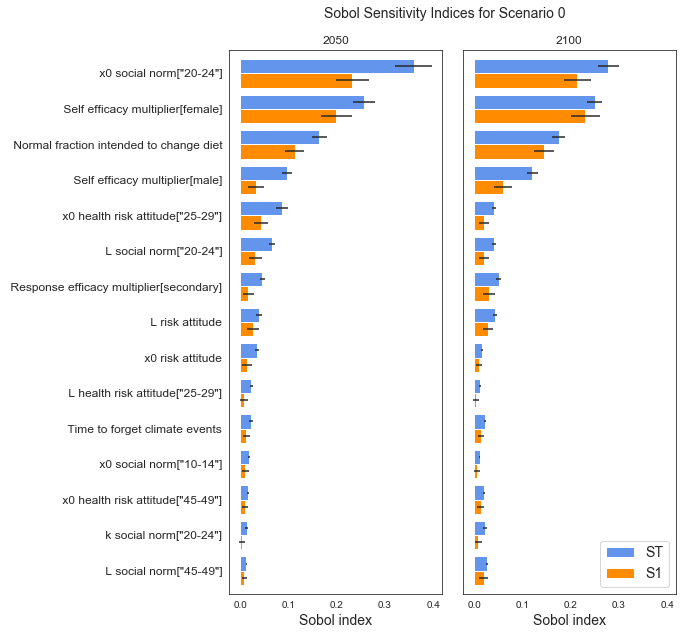

In [14]:
plot_scores_2(inds1, err1, inds2, err2, n, sc)
plt.show()

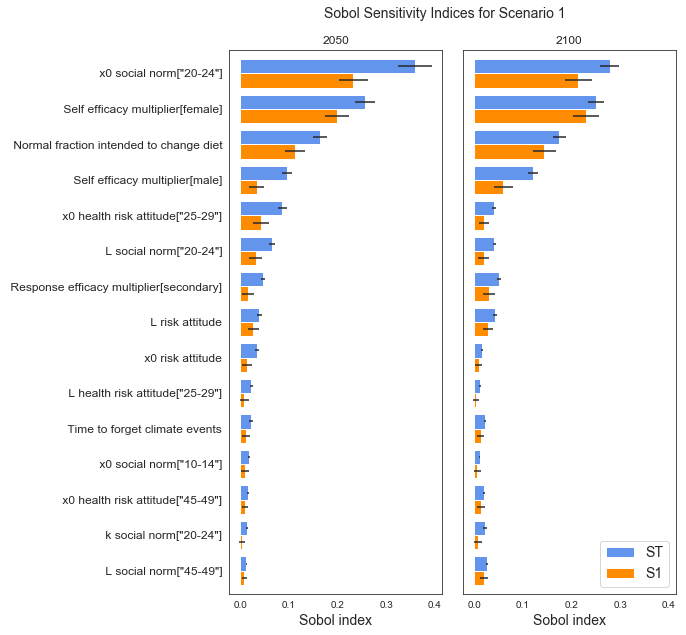

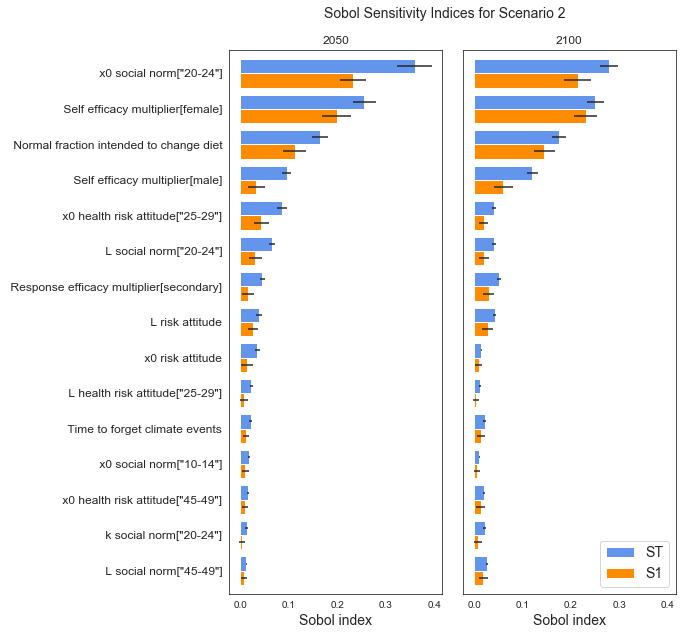

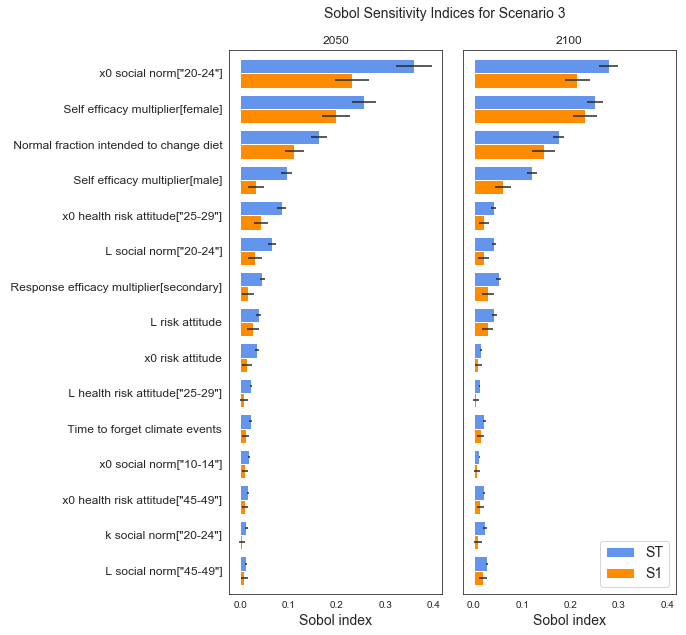

In [38]:
for sc in [2, 3, 4]:
    results1 = load_results(r_dir+'Diet_Sobol_n2500_sc{}_v4_2050.tar.gz'.format(sc))
    experiments, outcomes = results1
    data = outcomes['Total Agricultural and Land Use Emissions']
    scores1 = sobol.analyze(problem, data, calc_second_order=True, print_to_console=False)

    results2 = load_results(r_dir+'Diet_Sobol_n2500_sc{}_v4.tar.gz'.format(sc))
    experiments, outcomes = results2
    data = outcomes['Total Agricultural and Land Use Emissions']
    scores2 = sobol.analyze(problem, data, calc_second_order=True, print_to_console=False)
    
    inds1, err1 = make_sobol_df(scores1, problem, n, sc, 2050)
    inds2, err2 = make_sobol_df(scores2, problem, n, sc, 2100)
    
    plot_scores_2(inds1, err1, inds2, err2, n, sc)
    plt.show()